In [1]:
# Setup dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
csv_covid_counties = '../Outputs/cleaned_covid_counties.csv'
covid_counties = pd.read_csv(csv_covid_counties)
#covid_counties

In [3]:
#Q2 Which states have the highest vaccination and infection rates?

In [4]:
#vaccination completed
#total cases

In [5]:
grouped_df = covid_counties.groupby('state').agg({'population': 'sum', 'total cases': 'sum', 'vaccination completed': 'sum'}).reset_index()
grouped_df.head()

,state,population,total cases,vaccination completed
0,AK,731545,297407,464153.0
1,AL,4903185,1658639,2417598.0
2,AR,3017804,994317,1584830.0
3,AZ,7278717,2471556,4668433.0
4,CA,39512223,12240589,28724394.0


In [6]:
grouped_df['covid_cases_%'] = (grouped_df['total cases'] / grouped_df['population'] * 100).round(2)
grouped_df['vaccinated_pop_%'] = (grouped_df['vaccination completed'] / grouped_df['population'] *100).round(2)

In [7]:
#grouped_df

In [8]:
grouped_df = grouped_df.sort_values(['covid_cases_%'], ascending=False)
grouped_df.head()                                                   

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
0,AK,731545,297407,464153.0,40.65,63.45
41,RI,1059361,426947,820172.0,40.30,77.42
29,ND,762062,290693,415832.0,38.15,54.57
17,KY,4467673,1687705,2511980.0,37.78,56.23
51,WV,1792147,650365,1040252.0,36.29,58.05


In [9]:
grouped_df = grouped_df.sort_values(['vaccinated_pop_%'], ascending=True)
grouped_df.head()   

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
25,MP,53600,13395,0.0,24.99,0.00
7,DC,705749,178904,0.0,25.35,0.00
31,NH,1359711,379433,0.0,27.91,0.00
1,AL,4903185,1658639,2417598.0,33.83,49.31
10,GA,10617423,2976769,5382631.0,28.04,50.70


r value: 0.1
p value: 0.47
regression equation: y=0.43*x+47.54


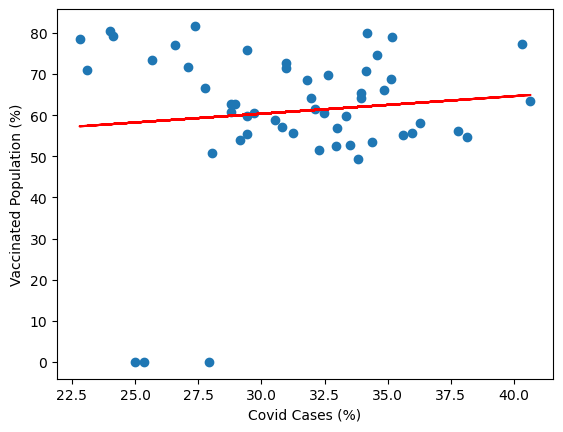

In [10]:
slope, intc, r, p, std_err = linregress(grouped_df['covid_cases_%'], grouped_df['vaccinated_pop_%'])
model=slope*grouped_df["covid_cases_%"]+intc
plt.scatter(grouped_df["covid_cases_%"], grouped_df["vaccinated_pop_%"])
plt.plot(grouped_df["covid_cases_%"], model, color='red')
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))
plt.xlabel("Covid Cases (%)")
plt.ylabel("Vaccinated Population (%)")
plt.savefig("covid_vaccination_regression.png")

In [11]:
#we dropped the three states which we assume had missing data
grouped_df_min_3 = grouped_df[grouped_df['vaccination completed'] != 0]

r value: -0.33
p value: 0.02
regression equation: y=-0.74*x+87.98


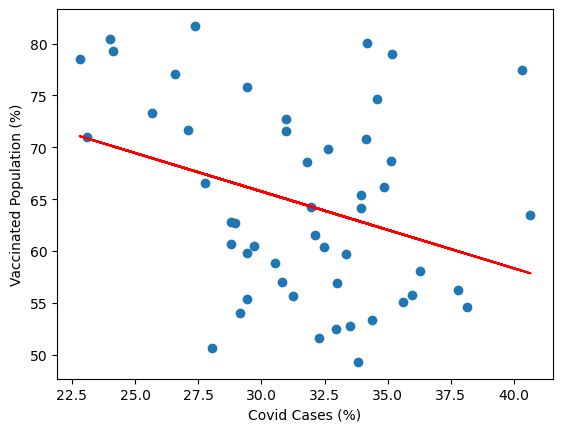

In [12]:
slope, intc, r, p, std_err = linregress(grouped_df_min_3['covid_cases_%'], grouped_df_min_3['vaccinated_pop_%'])
model=slope*grouped_df_min_3["covid_cases_%"]+intc
plt.scatter(grouped_df_min_3["covid_cases_%"], grouped_df_min_3["vaccinated_pop_%"])
plt.plot(grouped_df_min_3["covid_cases_%"], model, color='red')
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))
plt.xlabel("Covid Cases (%)")
plt.ylabel("Vaccinated Population (%)")
plt.savefig("covid_vaccination_regression_correct.png")

In [13]:
grouped_df_min_3

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
1,AL,4903185,1658639,2417598.0,33.83,49.31
10,GA,10617423,2976769,5382631.0,28.04,50.70
52,WY,578759,186790,298463.0,32.27,51.57
2,AR,3017804,994317,1584830.0,32.95,52.52
26,MS,2976149,997551,1570078.0,33.52,52.76
18,LA,4648794,1597940,2481895.0,34.37,53.39
24,MO,6137428,1788935,3318688.0,29.15,54.07
29,ND,762062,290693,415832.0,38.15,54.57
44,TN,6829174,2431986,3764812.0,35.61,55.13
13,ID,1787065,525855,989251.0,29.43,55.36


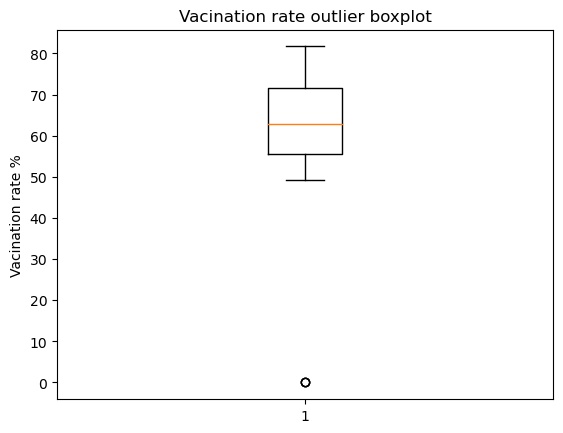

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Vacination rate outlier boxplot')
ax1.set_ylabel('Vacination rate %')
ax1.boxplot(grouped_df['vaccinated_pop_%'])
plt.show()
fig1.savefig("vaccination_boxplot.png")

In [15]:
'''
fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df['covid_cases_%'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df_min_3['covid_cases_%'])
plt.show()
'''

"\nfig1, ax1 = plt.subplots()\nax1.set_title('Covid cases outlier boxplot')\nax1.set_ylabel('Covid cases %')\nax1.boxplot(grouped_df['covid_cases_%'])\nplt.show()\n\nfig1, ax1 = plt.subplots()\nax1.set_title('Covid cases outlier boxplot')\nax1.set_ylabel('Covid cases %')\nax1.boxplot(grouped_df_min_3['covid_cases_%'])\nplt.show()\n"

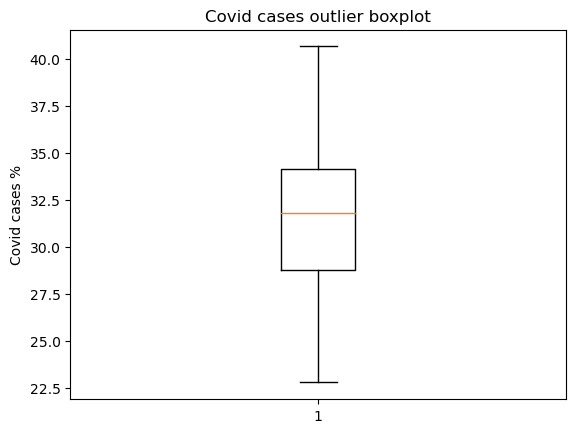

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df['covid_cases_%'])
plt.show()
fig1.savefig("covid_cases_boxplot.png")

In [ ]:
grouped_df_min_3

In [46]:
#Q2 Which states have the highest vaccination and infection rates?

top_5_states_covid = grouped_df_min_3.nlargest(5, ['covid_cases_%'])
buttom_5_states_covid = grouped_df_min_3.nsmallest(5, ['covid_cases_%'])
top_5_states_vaccination = grouped_df_min_3.nlargest(5, ['vaccinated_pop_%'])
buttom_5_states_vaccination = grouped_df_min_3.nsmallest(5, ['vaccinated_pop_%'])

df_concat_co = pd.concat([top_5_states_covid, buttom_5_states_covid], axis=0)
df_concat_va = pd.concat([top_5_states_covid, buttom_5_states_covid], axis=0)

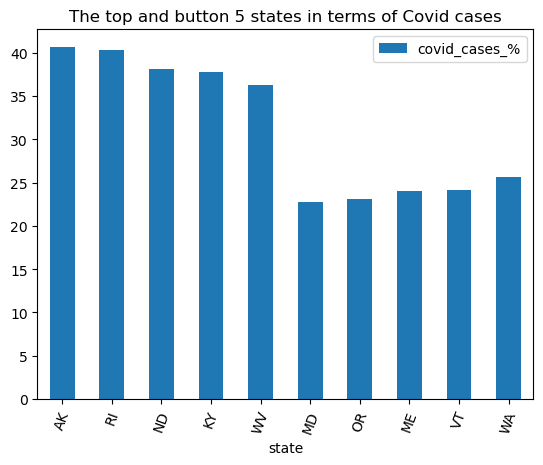

In [51]:
df_concat_co.plot.bar(x="state", y='covid_cases_%', rot=70, title="The top and button 5 states in terms of Covid cases");
plt.savefig("Covid_cases_bar_chart.png")

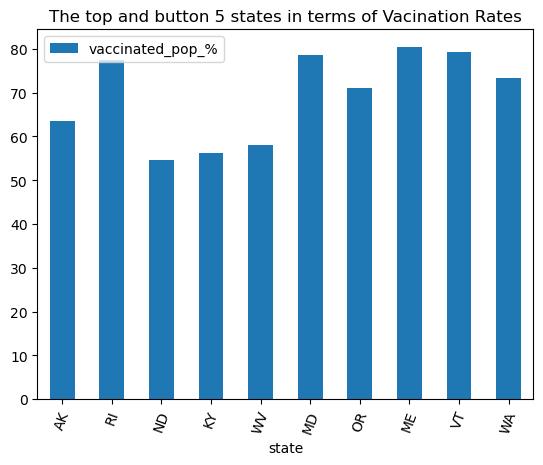

In [52]:
df_concat_va.plot.bar(x="state", y='vaccinated_pop_%', rot=70, title="The top and button 5 states in terms of Vacination Rates");
plt.savefig("Vacination_rates_bar_chart.png")